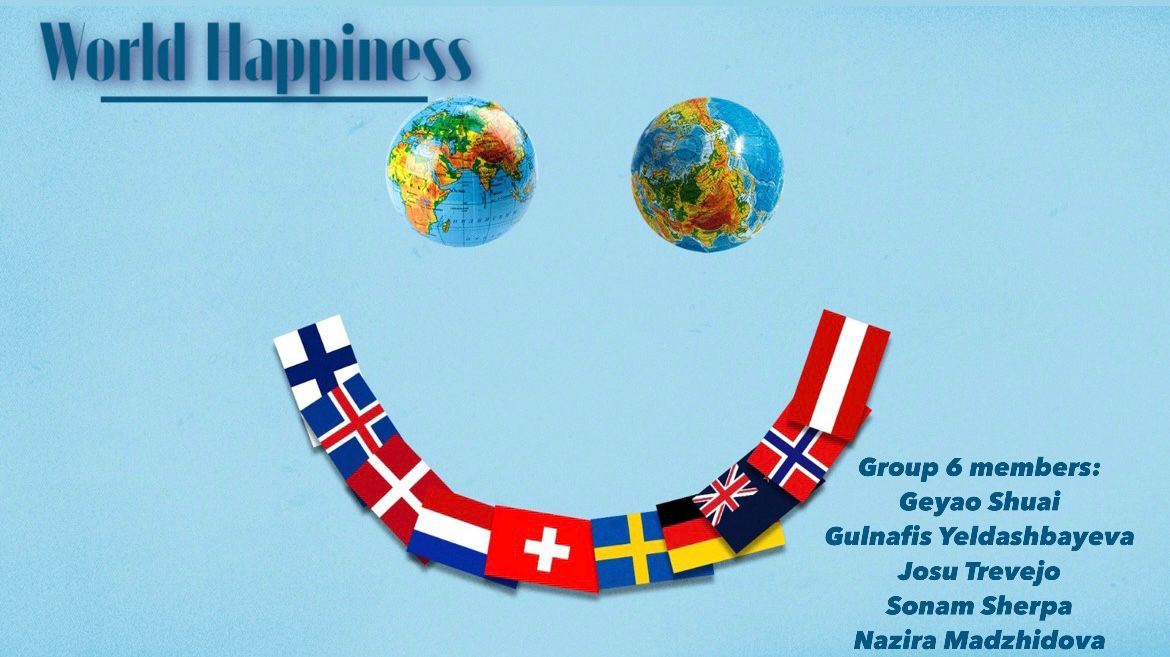

In [1]:
from IPython.display import Image
Image(filename='C:/Users/brocc/OneDrive/Рабочий стол/happiness ppt/title.jpg')

# World Happiness - Project question

How has happiness around the world changed between 2015-2020 and what factors affect happiness?

# Overview

The World Happiness Report is a publication that contains articles and rankings of national happiness, based on respondent ratings of their own lives, which the report also correlates with various (quality of) life factors.

# Data Description

Data Sources:

World Happiness Corruption https://worldhappiness.report

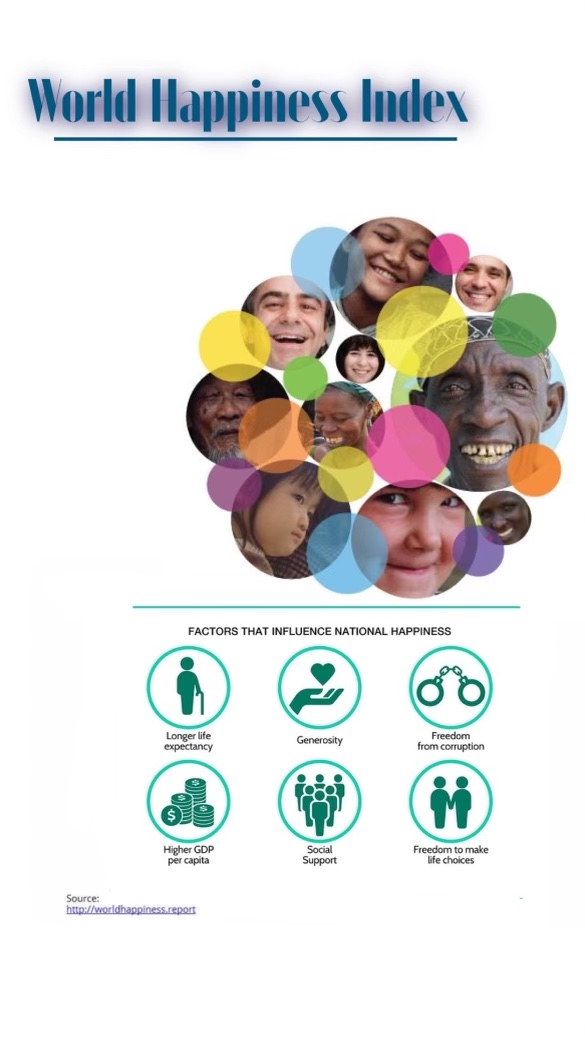

In [18]:
Image(filename='C:/Users/brocc/OneDrive/Рабочий стол/happiness ppt/index.jpg')

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from pandas import DataFrame, Series
import numpy as np

In [3]:
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')

In [7]:
happiness = pd.read_csv('WorldHappiness_Corruption_2015_2020.csv')

In [6]:
happiness.columns

Index(['Country', 'happiness_score', 'gdp_per_capita', 'family', 'health',
       'freedom', 'generosity', 'government_trust', 'dystopia_residual',
       'continent', 'Year', 'social_support', 'cpi_score'],
      dtype='object')

# EDA

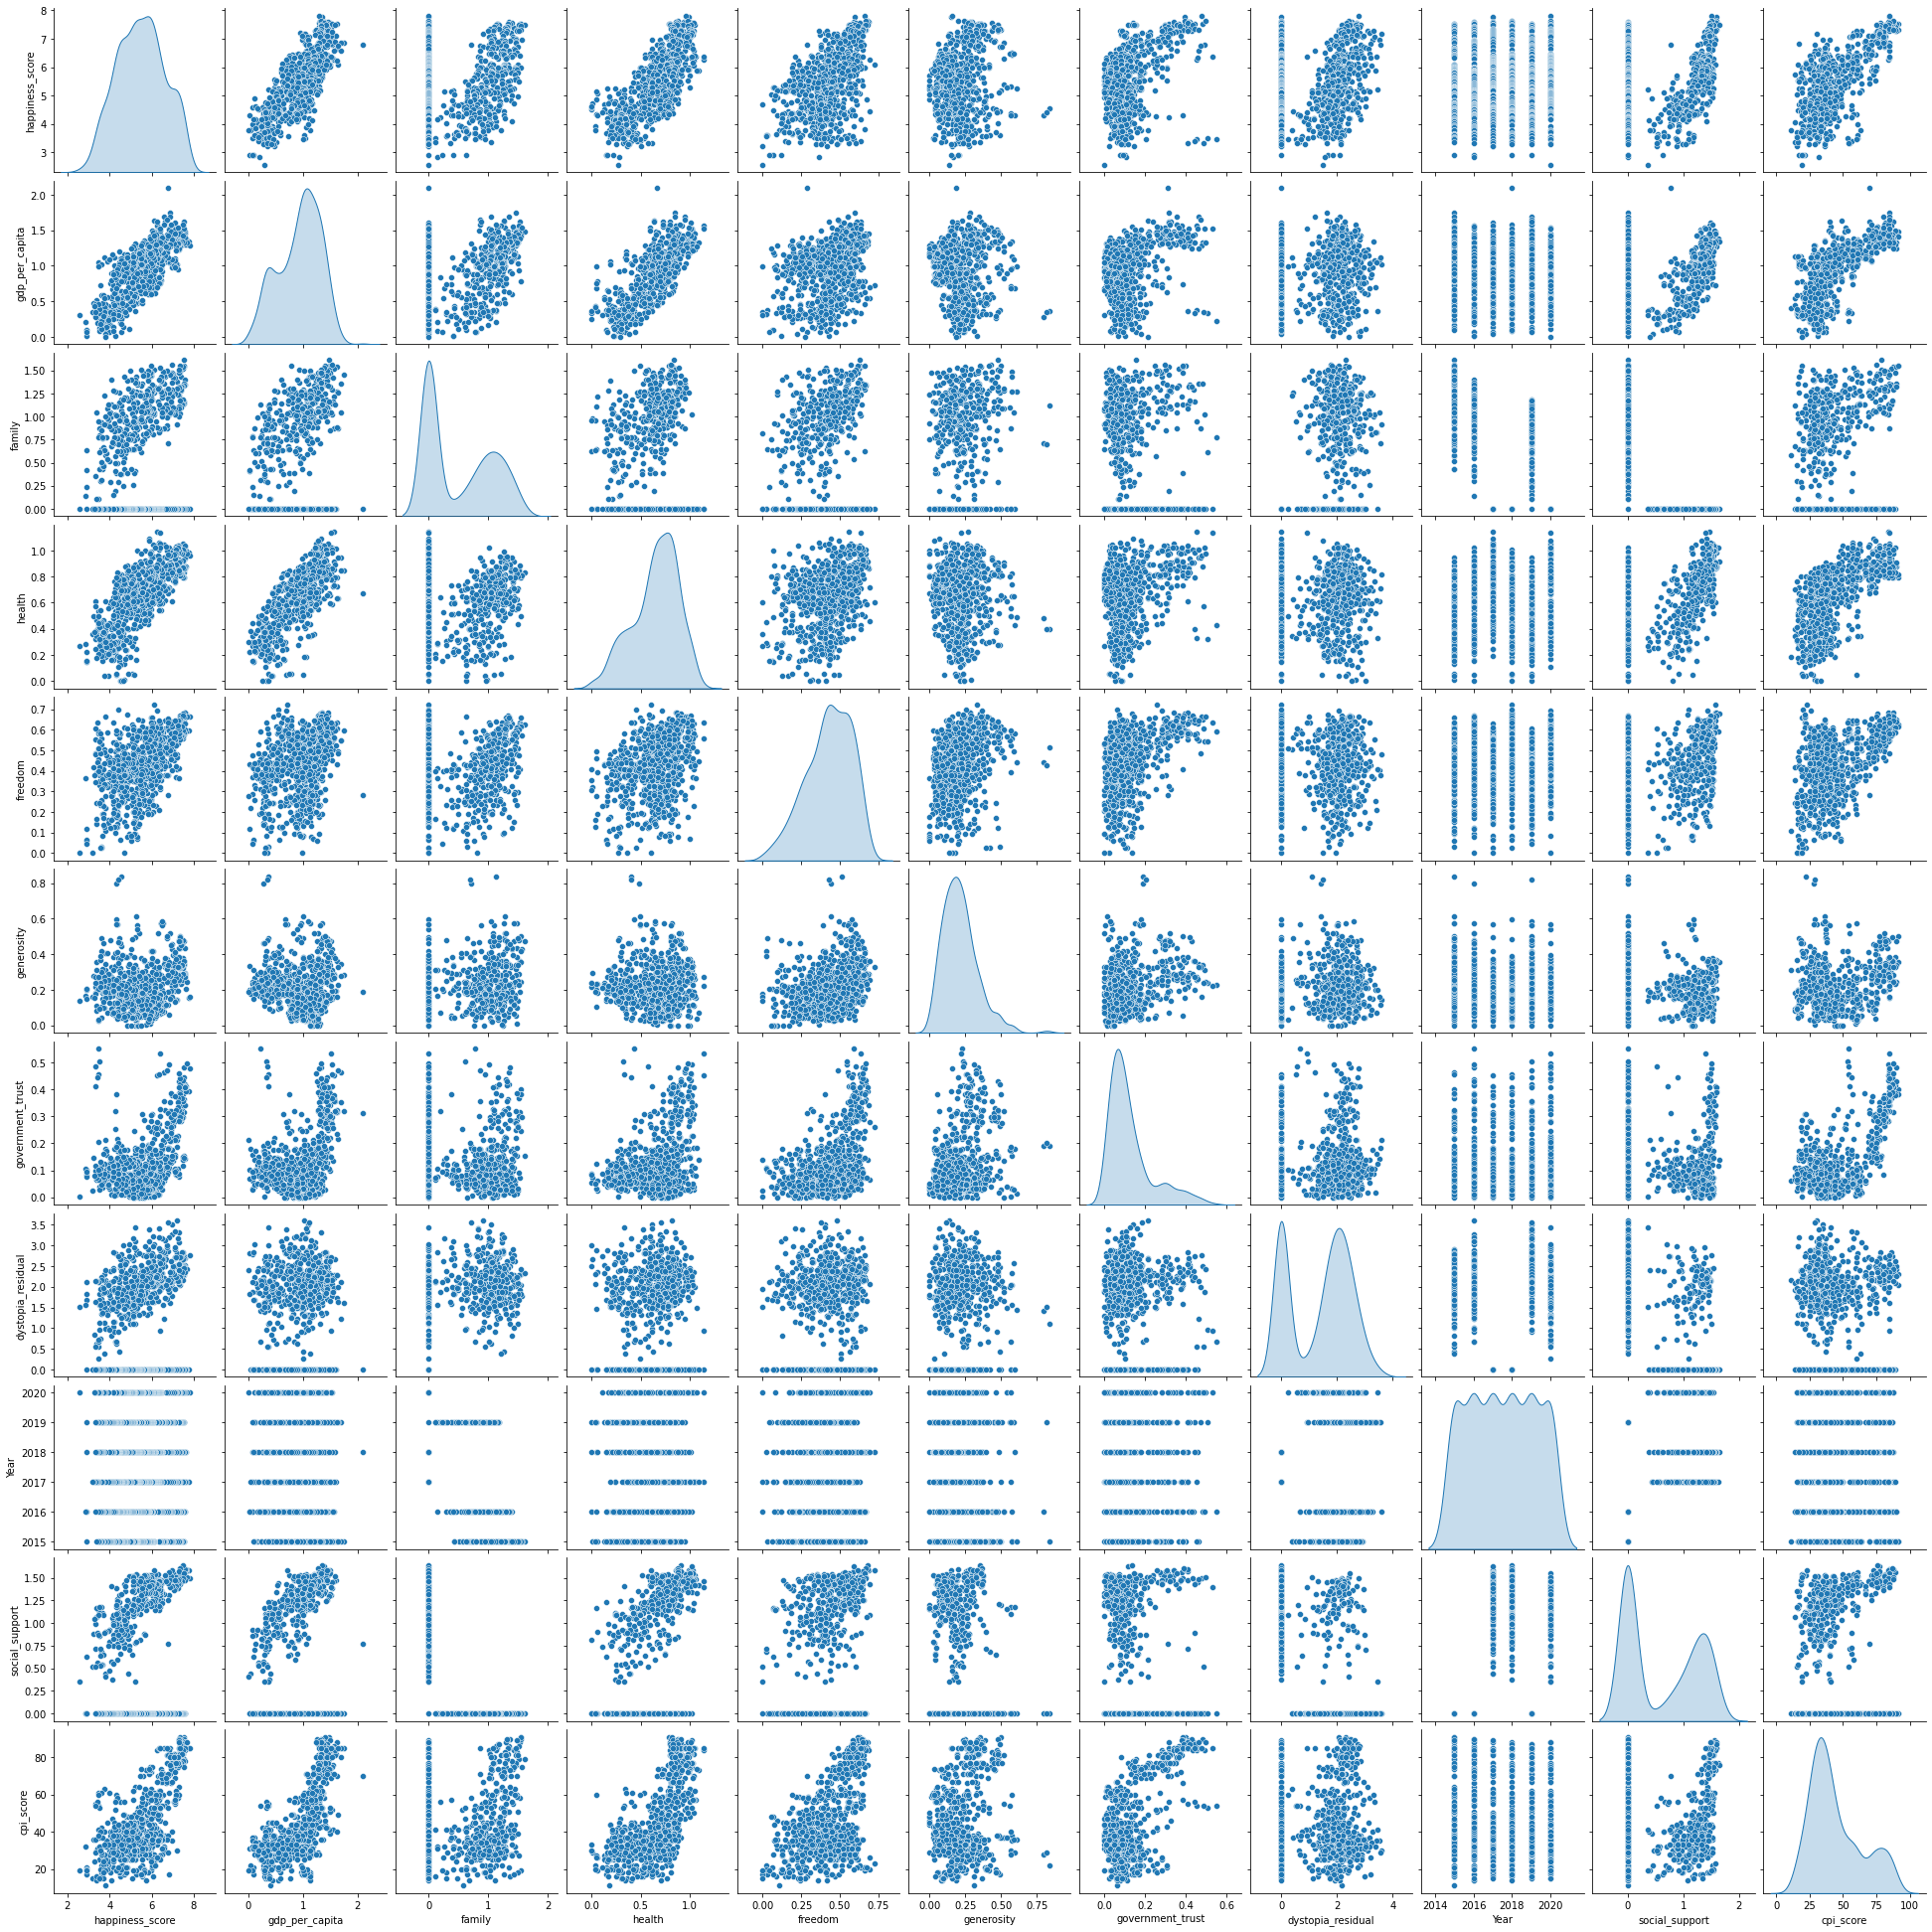

In [8]:
sns.pairplot(happiness, diag_kind='kde') 

#### We see that happiness score and health are positively correlated showing that people in countries with a health taken care better tend to have a higher happiness score. Countries' GDP_per_capita and CPI_score also have a positive correlation with Happiness Score.

In [27]:
#the number of the missing values
#happiness.isnull().sum()

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.0,88
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.0,91
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.0,79
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.0,86
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.0,90


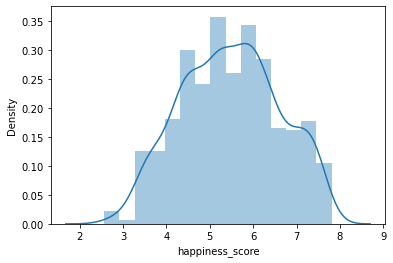

In [9]:
sns.distplot(happiness['happiness_score'])
happiness.head()

In [10]:
print(happiness.corr())  #data to be plotted

                   happiness_score  gdp_per_capita    family    health  \
happiness_score           1.000000        0.793267  0.154946  0.753534   
gdp_per_capita            0.793267        1.000000  0.218191  0.774980   
family                    0.154946        0.218191  1.000000 -0.054683   
health                    0.753534        0.774980 -0.054683  1.000000   
freedom                   0.544284        0.340260  0.013833  0.381869   
generosity                0.155419       -0.018355  0.245437 -0.028882   
government_trust          0.455477        0.359068  0.114767  0.312741   
dystopia_residual         0.174161        0.042710  0.600243 -0.073157   
Year                      0.023495       -0.035782 -0.588630  0.070172   
social_support            0.192633        0.111701 -0.869885  0.347438   
cpi_score                 0.693001        0.704483  0.132031  0.644478   

                    freedom  generosity  government_trust  dystopia_residual  \
happiness_score    0.544284    

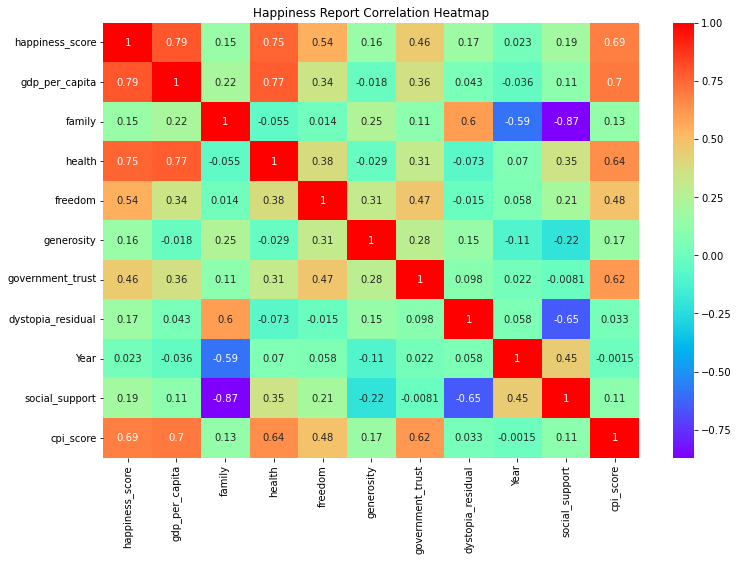

In [11]:
plt.figure(figsize=(12,8)) #width=12, height=8
sns.heatmap(happiness.corr(), annot= True, cmap="rainbow") 
plt.title( "Happiness Report Correlation Heatmap" )
plt.show()

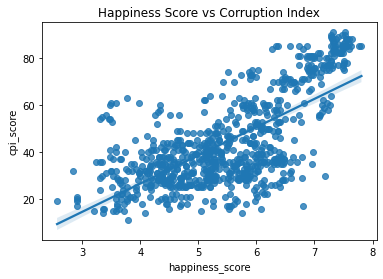

In [12]:
sns.regplot(x="happiness_score", y = "cpi_score", data=happiness, scatter_kws={'alpha':0.8})
plt.title("Happiness Score vs Corruption Index")
plt.show()

# Continents' Hapiness Difference (2020)

# The Happiest Continent

#### We see the highest continent to lowest continent ( Happy )

1- Australia 2- North America 3- Europe 4- South America 5- Asia 6- Afica

In [4]:
df = pd.read_csv("WorldHappiness2020.csv")

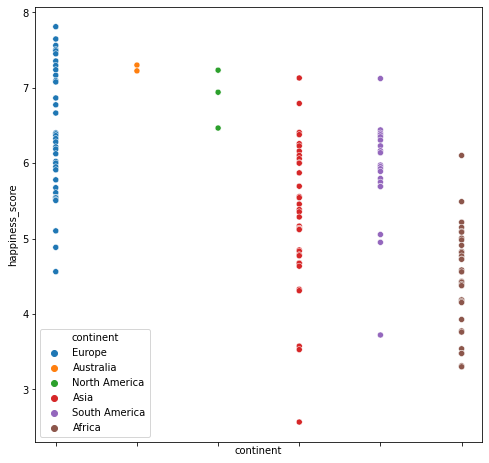

In [15]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='continent',y='happiness_score', data=df,
                hue='continent',alpha=1)
plt.tick_params(labelbottom=False)

# Crucial Variables in Different Continent

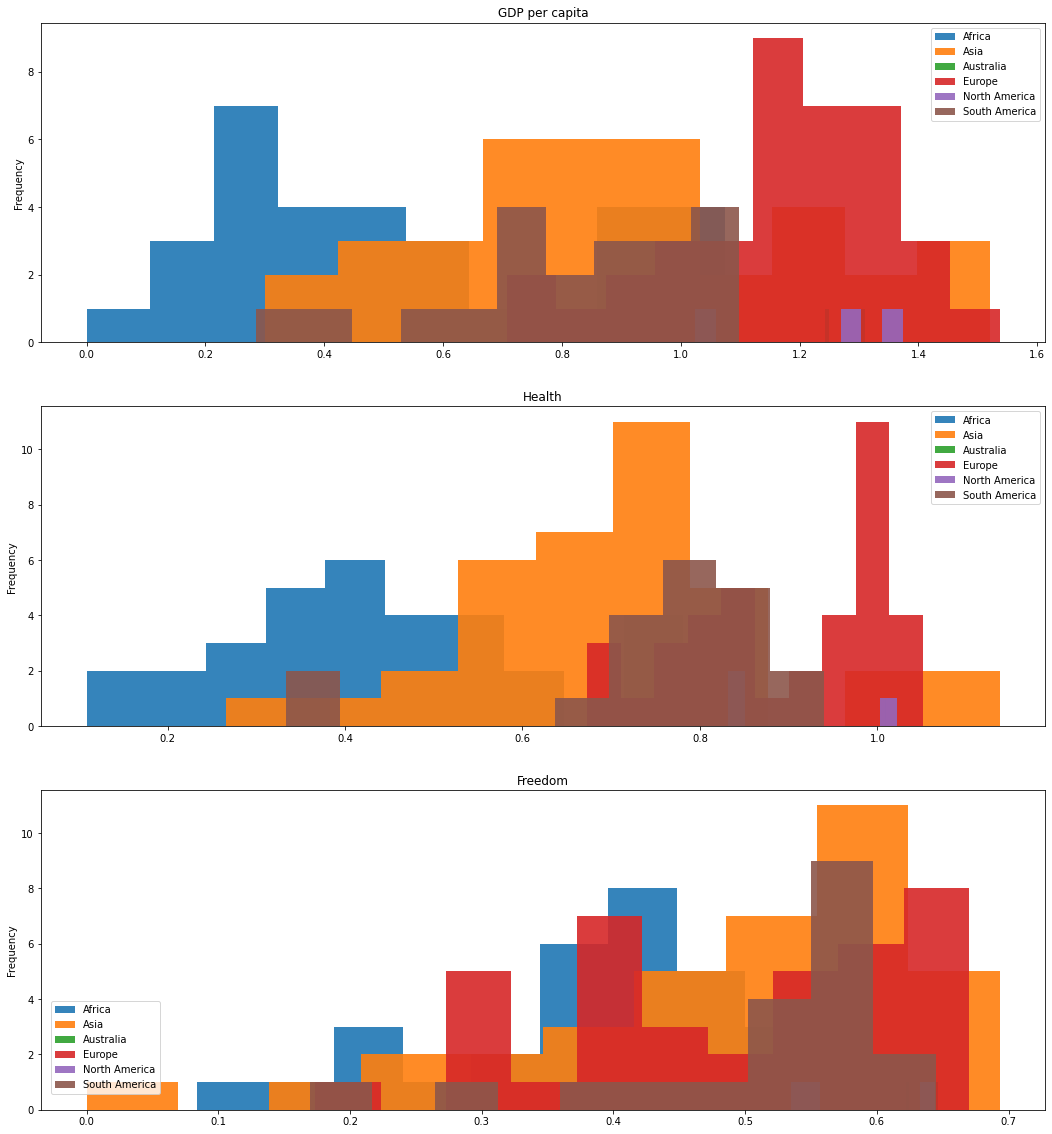

In [16]:
fig, ax = plt.subplots(3,1,figsize=(18,20))
df.groupby('continent')['gdp_per_capita'].plot.hist(bins=10, alpha=0.9, legend=True, ax=ax[0])
ax[0].set_title('GDP per capita')
ax[0].tick_params(labelbottom=True)
df.groupby('continent')['health'].plot.hist(bins=10, alpha=0.9, legend=True, ax=ax[1])
ax[1].set_title('Health')
ax[1].tick_params(labelbottom=True)
df.groupby('continent')['freedom'].plot.hist(bins=10, alpha=0.9, ax=ax[2])
ax[2].set_title('Freedom')
ax[2].tick_params(labelbottom=True)
ax[2].legend(loc=(0.01,0.05))
plt.show()

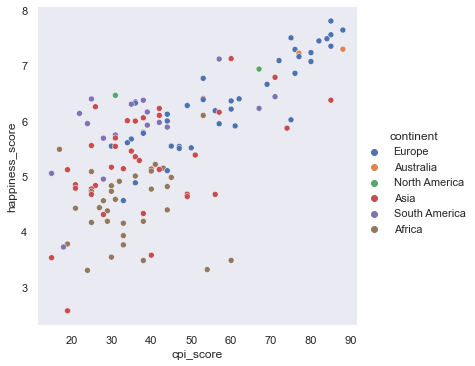

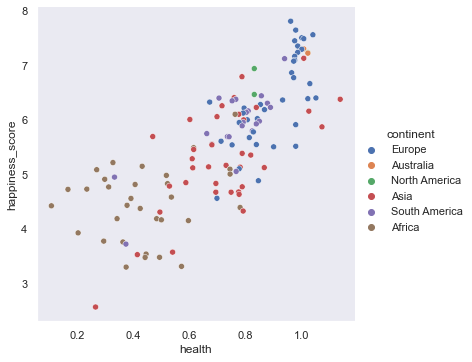

In [5]:
sns.set_theme(style="dark")
sns.relplot(x="cpi_score", y="happiness_score",data=df, hue = 'continent')
sns.set_theme(style="dark")
sns.relplot(x="health", y="happiness_score",data=df, hue = 'continent')
sns.set_theme(style="dark")

# Correlation Between Happiness Score and Other Health Indicators

##### In this section, we will show the relationship between happiness scores and other health index scores. The goal of this analyis is to determine if any other indicators can help predict happiness. 

##### The following data was used for this analysis

* WorldHappiness_Corruption_2015_2020: Shows the happiness scores by country based on the following indicators, economic production, social support, life expectancy, freedom, absence of corruption, and generosity


* prevalence-of-undernourishment: Shows by country the percentage of their population which has a caloric (dietary energy) intake which is insufficient to meet the minimum energy requirements


* share-of-children-underweight: Shows by country the percentage of their population of children who are defined as underweight.


* share-of-children-with-a-weight-too-low-for-their-height-wasting: Shows by country the percentge of their population of children who are dangerously thin for their height. 


* share-of-children-younger-than-5-who-suffer-from-stunting: Shows by country the percentge of their population of children who are considered short for their age. 

In [ ]:
happiness = pd.read_csv('WorldHappiness_Corruption_2015_2020.csv')
undernourishment = pd.read_csv('prevalence-of-undernourishment.csv')
underweight = pd.read_csv('share-of-children-underweight.csv')
low_weight_and_height = pd.read_csv('share-of-children-with-a-weight-too-low-for-their-height-wasting.csv')
stunting = pd.read_csv('share-of-children-younger-than-5-who-suffer-from-stunting.csv')

#### Taking a Quick Glance at the Data

In [ ]:
happiness.head(5)

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.0,88
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.0,91
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.0,79
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.0,86
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.0,90


In [ ]:
undernourishment.head(5)

,Entity,Code,Year,Prevalence of undernourishment (% of population)
0,Afghanistan,AFG,2001,47.799999
1,Afghanistan,AFG,2002,45.599998
2,Afghanistan,AFG,2003,40.599998
3,Afghanistan,AFG,2004,38.000000
4,Afghanistan,AFG,2005,36.099998


In [ ]:
hunger.head(5)

,Entity,Code,Year,Global Hunger Index (2021),411773-annotations
0,Afghanistan,AFG,2000,50.9,NaN
1,Afghanistan,AFG,2006,42.7,NaN
2,Afghanistan,AFG,2012,34.3,NaN
3,Afghanistan,AFG,2021,28.3,NaN
4,Albania,ALB,2000,20.7,NaN


In [ ]:
underweight.head(5)

,Entity,Code,Year,"Prevalence of underweight, weight for age (% of children under 5)"
0,Afghanistan,AFG,1997,44.900002
1,Afghanistan,AFG,2004,32.900002
2,Afghanistan,AFG,2013,24.600000
3,Afghanistan,AFG,2018,19.100000
4,Albania,ALB,1997,7.100000


In [ ]:
low_weight_and_height.head(5)

,Entity,Code,Year,"Prevalence of wasting, weight for height (% of children under 5)"
0,Afghanistan,AFG,1997,18.200001
1,Afghanistan,AFG,2004,8.600000
2,Afghanistan,AFG,2013,9.500000
3,Afghanistan,AFG,2018,5.100000
4,Albania,ALB,1997,8.100000


In [ ]:
stunting.head(5)

,Entity,Code,Year,"Prevalence of stunting, height for age (% of children under 5)"
0,Afghanistan,AFG,1997,53.200001
1,Afghanistan,AFG,2004,59.299999
2,Afghanistan,AFG,2013,40.400002
3,Afghanistan,AFG,2018,38.200001
4,Albania,ALB,1997,20.400000


#### Statistical Summary of the Data

In [ ]:
happiness.describe()

,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,Year,social_support,cpi_score
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,5.473310,0.929217,0.504998,0.648691,0.427016,0.212440,0.125720,1.379277,2017.500000,0.609302,44.327020
std,1.124726,0.385774,0.552736,0.232261,0.148003,0.121660,0.109032,1.075276,1.708904,0.640754,19.508833
min,2.566900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000,11.000000
25%,4.590750,0.644242,0.000000,0.510070,0.325433,0.125784,0.052863,0.000000,2016.000000,0.000000,30.000000
50%,5.485500,0.994544,0.000000,0.685397,0.439621,0.197000,0.089000,1.731948,2017.500000,0.176214,38.000000
75%,6.300500,1.228678,1.040410,0.815641,0.546280,0.273250,0.154250,2.236894,2019.000000,1.268250,57.000000
max,7.808700,2.096000,1.610574,1.141000,0.724000,0.838075,0.551910,3.602140,2020.000000,1.644000,91.000000


In [ ]:
undernourishment.describe()

,Year,Prevalence of undernourishment (% of population)
count,3344.000000,3344.000000
mean,2010.000000,11.203725
std,5.478045,11.463323
min,2001.000000,2.500000
25%,2005.000000,2.500000
50%,2010.000000,6.700000
75%,2015.000000,15.435234
max,2019.000000,81.699997


In [ ]:
hunger.describe()

,Year,Global Hunger Index (2021)
count,471.000000,471.000000
mean,2010.127389,19.824628
std,7.852951,13.449570
min,2000.000000,2.500000
25%,2006.000000,8.800000
50%,2012.000000,17.000000
75%,2021.000000,28.550000
max,2021.000000,65.100000


In [ ]:
underweight.describe()

,Year,"Prevalence of underweight, weight for age (% of children under 5)"
count,1226.000000,1226.000000
mean,2005.761011,15.070761
std,8.843352,12.083167
min,1983.000000,0.000000
25%,2000.000000,4.600000
50%,2006.000000,13.166591
75%,2013.000000,22.100000
max,2020.000000,66.800003


In [ ]:
low_weight_and_height.describe()

,Year,"Prevalence of wasting, weight for height (% of children under 5)"
count,943.000000,943.000000
mean,2005.095440,6.700935
std,9.133674,4.937012
min,1983.000000,0.000000
25%,1998.000000,2.800000
50%,2006.000000,5.600000
75%,2013.000000,9.600000
max,2020.000000,25.299999


In [ ]:
stunting.describe()

,Year,"Prevalence of stunting, height for age (% of children under 5)"
count,940.000000,940.000000
mean,2004.887234,28.144149
std,9.034901,15.980866
min,1983.000000,0.000000
25%,1998.000000,15.175000
50%,2006.000000,28.000000
75%,2012.000000,39.349999
max,2020.000000,73.599998


#### Parsing and Combinig Data in Order to Perform Analysis 

##### Due to limitiations in the amount of data, we are only able to look at relationships between happiness scores and other health indicators for certain years. In order to perform our analyis that happiness data was parsed by years in order to match the other available health data. 

##### Once the data happiness data was parsed and cleaned for any records that did not have any happiness scores, we joined the other health data with the happiness data to allow for easier manipulation of the data. We perfomed this merger by country in order to insure we were comparing each countries scores to each other. We then removed any additional records where "NAs" were created so our results would not be sweked.  


In [ ]:
happiness2019 = happiness.query("Year == '2019'")
happiness2018 = happiness.query("Year == '2018'")

In [ ]:
undernourishment2019 = undernourishment.query("Year == '2019'").dropna()
cleaned_undernourishment2019 = undernourishment2019.rename(columns={"Entity":"Country"}) 

underweight2019 = underweight.query("Year == '2019'").dropna()
cleaned_underweight2019 = underweight2019.rename(columns={"Entity":"Country"}) 

stunting2019 = stunting.query("Year == '2019'").dropna()
cleand_stunting2019 = stunting2019.rename(columns={"Entity":"Country"}) 

low_weight_and_height2018 = low_weight_and_height.query("Year == '2018'").dropna()
cleaned_low_weight_and_height2018 = low_weight_and_height2018.rename(columns={"Entity":"Country"}) 

In [ ]:
happiness_undernourishment2019_left = pd.merge(happiness2019, cleaned_undernourishment2019, on='Country', how='left')
cleaned_happiness_undernourishment2019 = happiness_undernourishment2019_left.dropna()


happiness_underweight2019_left = pd.merge(happiness2019, cleaned_underweight2019, on='Country', how='left')
cleaned_happiness2019 = happiness_underweight2019_left.dropna()

happiness_stunting2019_left = pd.merge(happiness2019, cleand_stunting2019, on='Country', how='left')
cleaned_happiness_stunting2019 = happiness_stunting2019_left.dropna()


happiness_low_weight_and_height2018_left = pd.merge(happiness2018, cleaned_low_weight_and_height2018, on='Country', how='left')
cleaned_happiness_low_weight_and_height2018_left2018 = happiness_low_weight_and_height2018_left.dropna()

#### Plotting Results

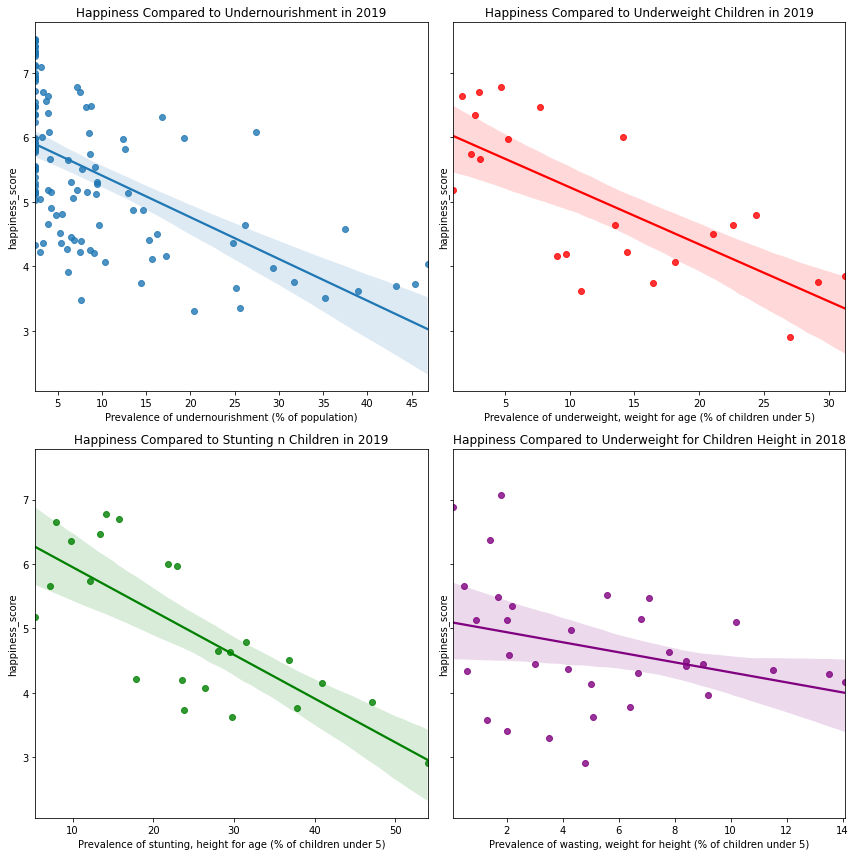

In [ ]:
fig , ax = plt.subplots(2,2, sharey=True, figsize=(12,12))

sns.regplot(x="Prevalence of undernourishment (% of population)", y="happiness_score", 
            data=cleaned_happiness_undernourishment2019, ax=ax[0,0])

ax[0, 0].set_title("Happiness Compared to Undernourishment in 2019")

sns.regplot(x="Prevalence of underweight, weight for age (% of children under 5)", y="happiness_score", 
            data=cleaned_happiness2019, ax=ax[0,1], scatter_kws={"color": "red"}, line_kws={"color": "red"})

ax[0, 1].set_title("Happiness Compared to Underweight Children in 2019")

sns.regplot(x="Prevalence of stunting, height for age (% of children under 5)", y="happiness_score", 
            data=cleaned_happiness_stunting2019, ax=ax[1,0], scatter_kws={"color": "green"}, line_kws={"color": "green"})

ax[1, 0].set_title("Happiness Compared to Stunting in Children in 2019")

sns.regplot(x="Prevalence of wasting, weight for height (% of children under 5)", y="happiness_score", 
            data=cleaned_happiness_low_weight_and_height2018_left2018, ax=ax[1,1], scatter_kws={"color": "purple"}, line_kws={"color": "purple"})

ax[1, 1].set_title("Happiness Compared to Underweight for Children Height in 2018")

fig.tight_layout()

# Tableau

https://public.tableau.com/app/profile/sonam.sherpa5159/viz/CIS9655WorldHappinessReport/Story?publish=yes